<a href="https://colab.research.google.com/github/Ndaniel455/CU-DTSA/blob/main/DTSA_5510_Unsupervised_Algorithms_in_Machine_Learning_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mall Customer Segmentation using KMeans Clustering and Hierarchical Clustering

This data set is created for the purpose of learning customer segmentation concepts, also known as market basket analysis. In this project, we will demonstrate the application of unsupervised machine learning techniques such as KMeans Clustering Algorithm and hierarchical clustering dendrogram.

## Motivating the Analysis

Imagine you own a supermarket mall and you have access to some basic customer data through membership cards. This data includes customer ID, age, gender, annual income, and spending score. The spending score is assigned to each customer based on parameters like customer behavior and purchasing data.

## Problem Statement

The objective is to understand the customers in order to identify target customers and devise an effective marketing strategy. By applying machine learning algorithms, specifically KMeans Clustering, we can segment the customers based on their characteristics and preferences.

## Key Questions to Answer


1. How can we effectively apply machine learning algorithms, specifically KMeans Clustering and Hierarchical Clustering, to achieve customer segmentation?
2. Who are the target customers that we should focus our marketing strategy on, considering their potential to be easily engaged and converted into paying customers?

By addressing these questions, we aim to gain valuable insights into customer segmentation, allowing us to tailor marketing strategies to specific customer segments and improve customer engagement and conversion rates.


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

## Data Information

The dataset consists of five features that provide insights into customer behavior and preferences:

- `CustomerID`: A unique identifier assigned to each customer.

- `Gender`: The gender of the customer.

- `Age`: The age of the customer.

- `Annual Income (k$)`: The annual income of the customer, measured in thousands of USD.

- `Spending Score (1-100)`: A score assigned by the mall based on the customer's behavior and spending habits.

This dataset contains 200 samples.

In [16]:
df = pd.read_csv("data/Mall_Customers.csv")

## Data Import and Initial Data Exploration

To start the project, we will import the dataset and perform an initial exploration to gain a better understanding of its structure and contents.

Once the data is imported, we will proceed to view the data to examine its basic structure. By doing so, we can get a preliminary overview of the dataset, including the number of samples, the types of variables, and any initial insights that may emerge.

In [17]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
# Calculate frequencies and proportions for a categorical variable
cat_var = 'Gender'
frequencies = df[cat_var].value_counts()
proportions = df[cat_var].value_counts(normalize=True)
print(frequencies)
print(proportions)

Female    112
Male       88
Name: Gender, dtype: int64
Female    0.56
Male      0.44
Name: Gender, dtype: float64


Upon examining the data, we observe a relatively equal distribution between male and female customers. While gender is not a variable we will be utilizing in this particular analysis, it could be intriguing to explore potential differences in spending patterns between males and females.


In [5]:
df['CustomerID'].nunique()

200

## Exploratory Data Analysis (EDA) Analysis

In this phase, we will conduct an exploratory data analysis to gain insights and discover interesting trends within our dataset. By visualizing the data through various plots, we can identify patterns and draw initial conclusions about the distribution of our variables.

Using violin plots, we can examine the distribution of our data. The majority of the data appears to be centered around the mean, indicating a potential normal distribution. While our analysis does not rely on the assumption of normality, it is noteworthy to observe this trend.

Additionally, the violin plot for the annual income variable reveals a long tail, suggesting that there are fewer individuals with higher annual incomes. Specifically, there is a significant drop-off in the number of people earning over $90,000 per year.

These initial observations provide valuable insights into the data, allowing us to understand the distribution of key variables and identify potential trends that may shape our analysis. It is essential to consider these findings as we move forward with our project and explore further aspects of the data.


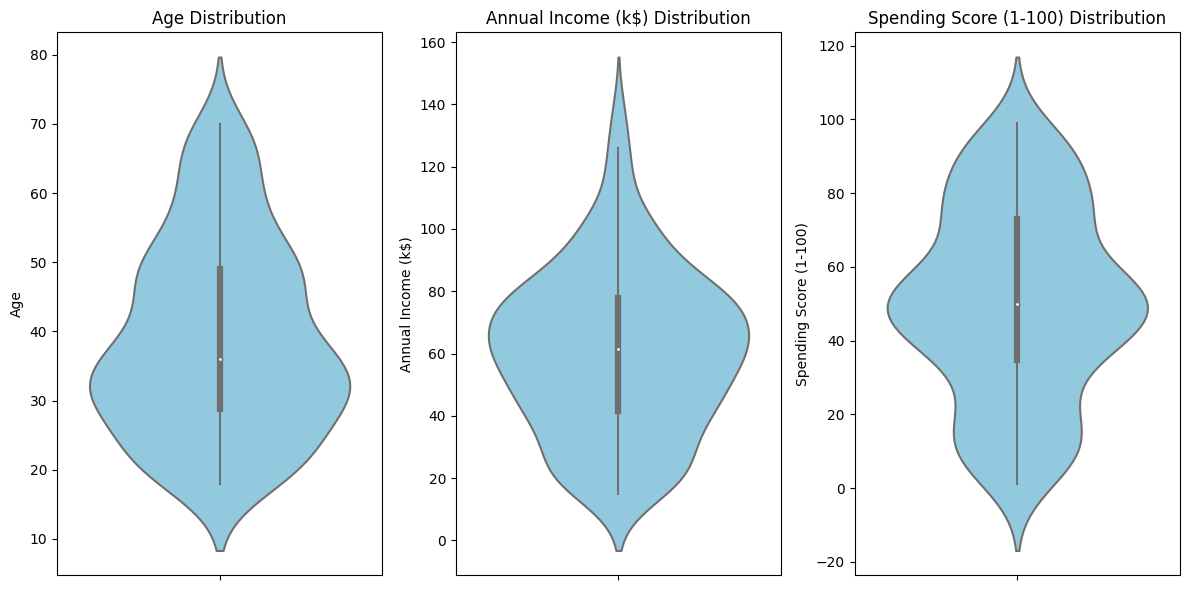

In [7]:
numerical_vars = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Create violin plots
plt.figure(figsize=(12, 6))
for i, var in enumerate(numerical_vars):
    plt.subplot(1, len(numerical_vars), i+1)
    sns.violinplot(y=df[var], color='skyblue')
    plt.ylabel(var)
    plt.title(f'{var} Distribution')


plt.tight_layout()
plt.show()

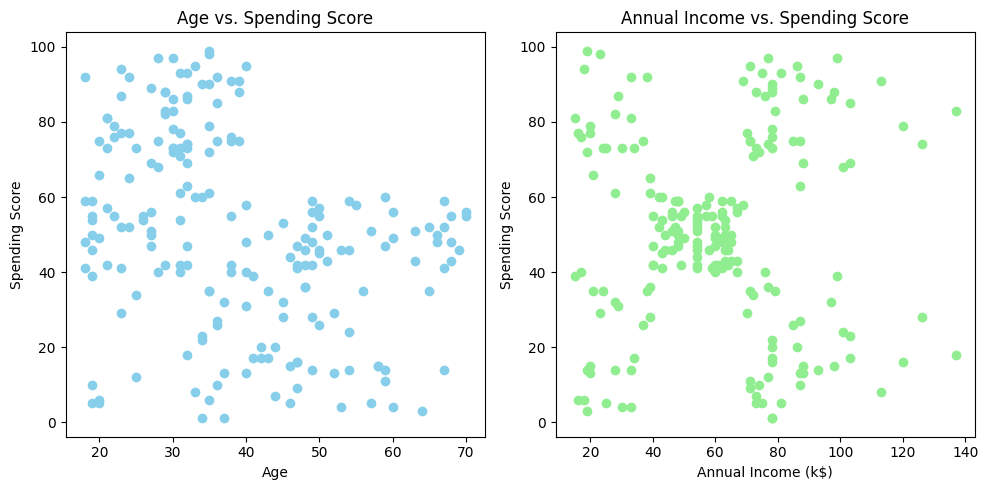

In [8]:
plt.figure(figsize=(10, 5))

# Scatter plot: Age vs. Spending Score
plt.subplot(1, 2, 1)
plt.scatter(df['Age'], df['Spending Score (1-100)'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs. Spending Score')

# Scatter plot: Annual Income vs. Spending Score
plt.subplot(1, 2, 2)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color='lightgreen')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Annual Income vs. Spending Score')


plt.tight_layout()
plt.show()

### Insights from Data Visualization

By examining the scatter plot of annual income versus spending score, we can observe distinct clusters that appear to be emerging within the data. This observation is encouraging, as it aligns with our intention of utilizing clustering algorithms for this analysis. The presence of identifiable clusters suggests that the data may exhibit clear patterns and separations based on customers' income and spending behaviors.

However, when considering the scatter plot of age versus spending score, it becomes apparent that the data does not exhibit well-defined borders or distinct clusters. As a result, we have made the decision to exclude age from the majority of our analysis. By focusing on the more pronounced relationship between annual income and spending score, we can more effectively leverage clustering algorithms to segment our customers based on their purchasing behavior.

### Data Cleaning

Upon initial inspection, the dataset appears to be well-maintained, as it does not contain any missing values or placeholders that could indicate missing data. Hence, there is no need to employ techniques to handle missing values in this particular dataset.

Furthermore, the code analysis reveals that there are no data points that fall outside the normal range of our dataset. This suggests the absence of outliers, as all the data points align within the expected range of values.

The absence of missing values and outliers simplifies the data cleaning and preprocessing phase, allowing us to proceed directly to the subsequent steps of our analysis. By starting with a clean and reliable dataset, we can focus our efforts on applying clustering algorithms and uncovering valuable insights about our customers' segmentation and behavior.



In [12]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [11]:
# Identify outliers using quartiles and interquartile range (IQR)
num_var = 'Age'
q1 = df[num_var].quantile(0.25)
q3 = df[num_var].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df[num_var] < lower_bound) | (df[num_var] > upper_bound)]
print(outliers)

Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


### Descriptive Statistics

Here we present the descriptive statistics for the numerical variables in the dataset. These statistics provide important insights into the central tendencies, variability, and quartiles of each variable. By examining measures such as the mean, standard deviation, and quartiles, we can gain a better understanding of the distribution and characteristics of the data.

Upon analyzing the descriptive statistics, we find that there are no alarming or concerning patterns or outliers that would require immediate attention. This implies that the data is reliable and suitable for further analysis. Consequently, we can confidently proceed with our customer segmentation analysis, leveraging the robustness and consistency of the dataset.


In [9]:
# Calculate summary statistics for numerical variables
summary_stats = df.describe()
print(summary_stats)

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


### Correlation Analysis

In this section, we conduct a correlation analysis to examine the relationships between different predictor variables in the dataset. By generating a correlation matrix and visualizing it through a heatmap, we can gain insights into the strength and direction of these correlations.

Upon analyzing the correlation matrix and heatmap, we observe that there are no significant trends or correlations that would pose any concerns for our analysis. While a slight correlation is observed between age and spending score, this correlation is not strong enough to impact our analysis adversely.


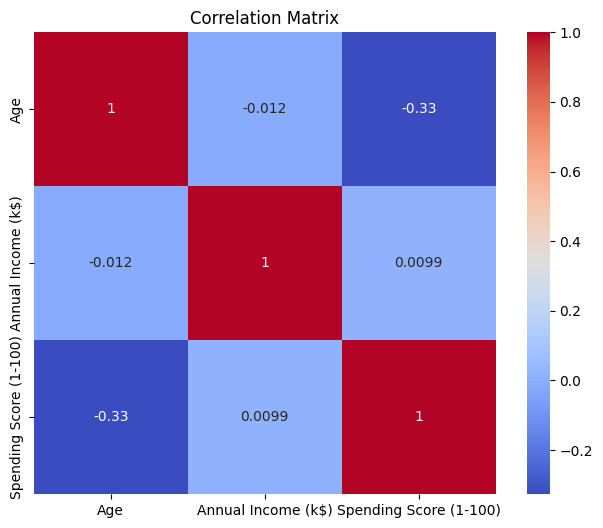

In [13]:
# Select the numerical variables for correlation analysis
numerical_vars = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Calculate correlation matrix
correlation_matrix = df[numerical_vars].corr()

# Visualize correlations using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()

## Data Preprocessing

In our previous steps, we identified an interesting clustering trend between annual income and spending score, making it the primary focus of our analysis. However, for a comprehensive analysis, it is essential to investigate other predictors such as age and gender.

Considering that gender is a categorical variable, we will utilize the one-hot encoding method to convert it into a numeric representation. This involves creating a new column, 'Gender_Male,' where a value of 1 indicates that the customer is male and 0 indicates that they are female.

By incorporating gender as a predictor variable, we can explore potential gender-based differences in customer behavior and spending patterns, further enhancing our customer segmentation analysis.

Additionally, we will continue to leverage the strong clustering relationship observed between annual income and spending score, allowing us to gain valuable insights into customer segmentation based on their financial profiles.

This data preprocessing step ensures that we have appropriately transformed and prepared our data for the subsequent stages of the analysis, enabling us to conduct a robust and comprehensive examination of customer segmentation.


In [19]:
# Select relevant features for clustering analysis
selected_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Extract the selected features from the dataframe
selected_df = df[selected_features]

# Standardize the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_df)

# Create a new dataframe with the standardized features
scaled_df = pd.DataFrame(scaled_features, columns=selected_features)

# Handle categorical variables (if any) using one-hot encoding
categorical_vars = ['Gender']
encoded_df = pd.get_dummies(df[categorical_vars], drop_first=True)

# Concatenate the standardized numerical features and encoded categorical features
preprocessed_df = pd.concat([scaled_df, encoded_df], axis=1)

# Display the preprocessed dataframe
print(preprocessed_df.head())


        Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0 -1.424569           -1.738999               -0.434801            1
1 -1.281035           -1.738999                1.195704            1
2 -1.352802           -1.700830               -1.715913            0
3 -1.137502           -1.700830                1.040418            0
4 -0.563369           -1.662660               -0.395980            0


## Model Building and Training

In this phase of the project, we will focus on building and training our models using two popular unsupervised machine learning algorithms: K-means clustering and hierarchical clustering dendrogram.

### K-means Clustering Algorithm:
The K-means clustering algorithm is a powerful technique for grouping data points into distinct clusters based on their similarity. It aims to minimize the sum of squared distances between data points and their corresponding cluster centers. One of the notable advantages of K-means clustering is its simplicity and efficiency, making it suitable for large datasets. By specifying the desired number of clusters (K), K-means assigns each data point to the nearest cluster center, resulting in well-defined and interpretable groupings. This algorithm provides intuitive insights into the underlying structure of the data, allowing for easy interpretation and actionable decision-making.

To determine the optimal number of clusters (K) for our dataset, we will employ an elbow plot. The elbow plot helps us identify the point where the decrease in within-cluster sum of squares (WCSS) starts to level off, indicating a reasonable trade-off between model complexity and clustering quality. This approach allows us to select the most appropriate value of K that strikes a balance between capturing meaningful variations in the data and avoiding excessive fragmentation or oversimplification of the clusters.

### Hierarchical Clustering Dendrogram:
Hierarchical clustering is another popular unsupervised learning algorithm that groups data points into clusters based on their similarity. Unlike K-means clustering, hierarchical clustering does not require specifying the number of clusters in advance. Instead, it constructs a hierarchical structure of clusters in the form of a dendrogram. This dendrogram allows for a comprehensive exploration of the data, capturing nested and overlapping clusters at different levels of granularity.

One of the key advantages of hierarchical clustering is its ability to handle various data distributions and capture complex relationships within the data. It does not rely on assumptions regarding the shape or size of clusters, making it more flexible and applicable to different types of datasets. By analyzing the hierarchical clustering dendrogram, we can gain insights into the distinct clusters present in the data and make informed decisions about the appropriate level of granularity for our analysis.

By leveraging the strengths of both K-means clustering and hierarchical clustering dendrogram, we aim to gain a comprehensive understanding of the customer segmentation in the mall dataset. These algorithms provide us with valuable tools to identify meaningful patterns, define distinct customer segments, and derive actionable insights for targeted marketing strategies, personalized customer experiences, and overall business growth.

In the following sections, we will proceed with model training and analysis, leveraging the power of these algorithms to unlock valuable insights from the mall customer segmentation dataset.

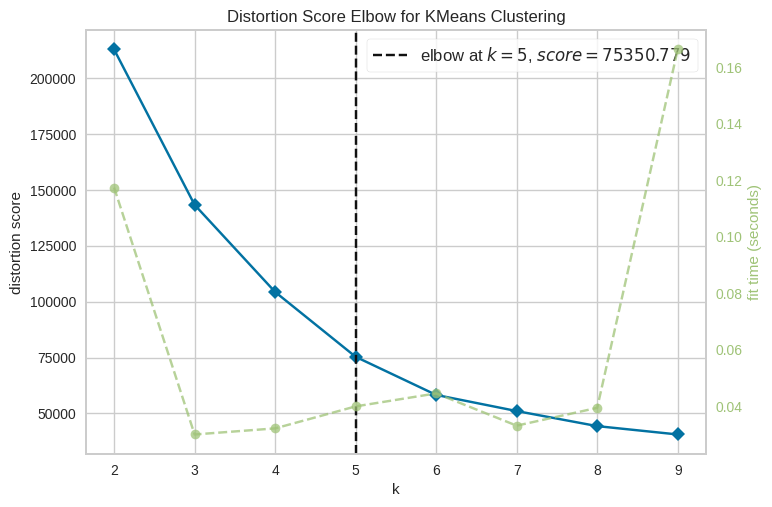

In [51]:
X_numerics = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] # subset with numeric variables only

model = KMeans(random_state=1, n_init=10)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

### Analyzing the Elbow Plot

Upon analyzing the elbow plot, it was observed that there was no distinct elbow point where the distortion score significantly leveled off. However, there appeared to be a gradual decrease in the distortion score as the number of clusters increased.

Considering the balance between model complexity and clustering quality, a value of K=5 or K=6 seemed to be the most appropriate choice. These values strike a balance between having enough clusters to capture meaningful variations in the data, without unnecessarily overcomplicating the model with an excessive number of clusters.

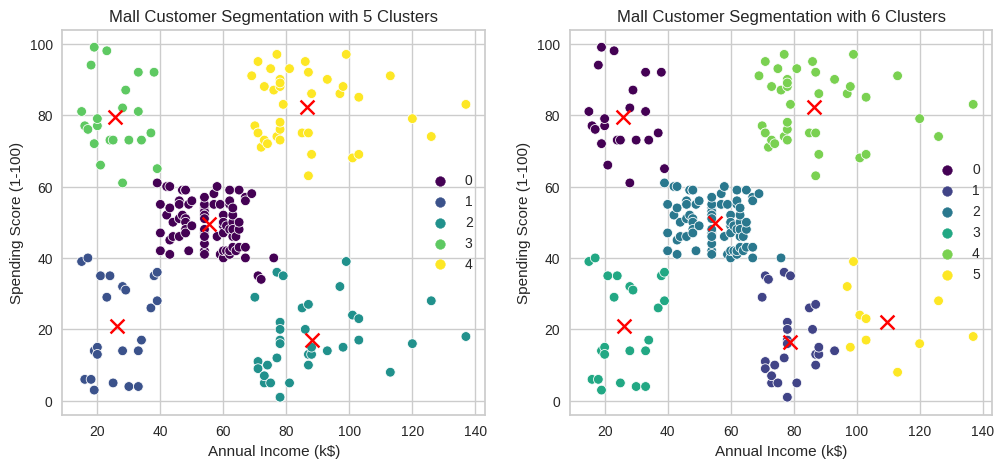

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First subplot with 5 clusters
kmeans_1 = KMeans(n_clusters=5, n_init=1)
kmeans_1.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
labels_1 = kmeans_1.labels_

axes[0].set_xlabel('Annual Income (k$)')
axes[0].set_ylabel('Spending Score (1-100)')
axes[0].set_title('Mall Customer Segmentation with 5 Clusters')

sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=labels_1, palette='viridis', ax=axes[0])
axes[0].scatter(kmeans_1.cluster_centers_[:, 0], kmeans_1.cluster_centers_[:, 1], marker='x', color='red', s=100)

# Second subplot with 6 clusters
kmeans_2 = KMeans(n_clusters=6, n_init=1)
kmeans_2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
labels_2 = kmeans_2.labels_

axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Spending Score (1-100)')
axes[1].set_title('Mall Customer Segmentation with 6 Clusters')

sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=labels_2, palette='viridis', ax=axes[1])
axes[1].scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], marker='x', color='red', s=100)

plt.show()

###Analyzing the K-means Clustering Plots
The first subplot showcases the clustering of the data into 5 segments. An intriguing observation emerges from the plot, revealing strong clusters below 40K per year, where customers demonstrate a propensity for high spending scores. Furthermore, a discernible cluster is evident among customers with an annual income above 75K, reflecting individuals with both high income levels and corresponding high spending scores. However, the absence of a clear cluster within the income range of 40K to 75K per year suggests a more complex distribution, where customers exhibit varying spending behaviors and lack a distinct grouping.

The second subplot demonstrates the clustering with an increased granularity of 6 segments. Although the additional subdivision allows for a more refined analysis within existing clusters, it does not substantially improve the identification of the missing income range cluster. Hence, a more thorough examination is warranted to comprehend the spending patterns and preferences of customers falling within this income bracket.

Both subplots serve as effective visual representations of the clustering outcomes, unveiling valuable insights into customer segmentation based on annual income and spending behavior. The utilization of K-means clustering enables the identification of distinct customer segments, contributing to targeted marketing strategies and personalized customer experiences.

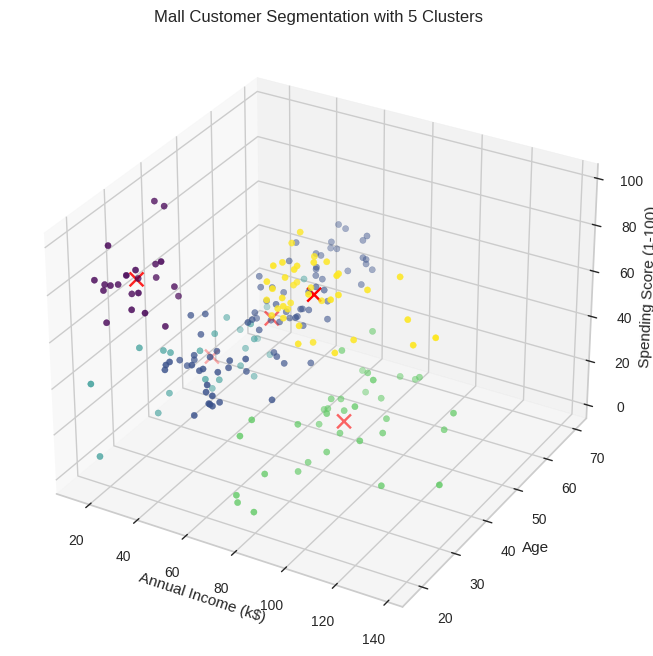

In [63]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

kmeans_1 = KMeans(n_clusters=5, n_init=1)
kmeans_1.fit(df[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']])
labels_1 = kmeans_1.labels_

ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Age')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Mall Customer Segmentation with 5 Clusters')

ax.scatter(df['Annual Income (k$)'], df['Age'], df['Spending Score (1-100)'], c=labels_1, cmap='viridis')
ax.scatter(kmeans_1.cluster_centers_[:, 0], kmeans_1.cluster_centers_[:, 1], kmeans_1.cluster_centers_[:, 2],
            marker='x', color='red', s=100)

plt.show()


### Adding Age as a predictor
From the 3D plot, it becomes evident that there is a distinct cluster of customers who are young (between 20 and 30 years old), earning less than $60,000 per year, yet displaying a significantly high spending score compared to the rest of the customers. This observation suggests that this particular segment of young customers exhibits a unique spending behavior, characterized by their willingness to spend despite their relatively lower income. Such insights derived from the plot can help businesses tailor their marketing strategies and offerings to better cater to the needs and preferences of this specific customer segment.

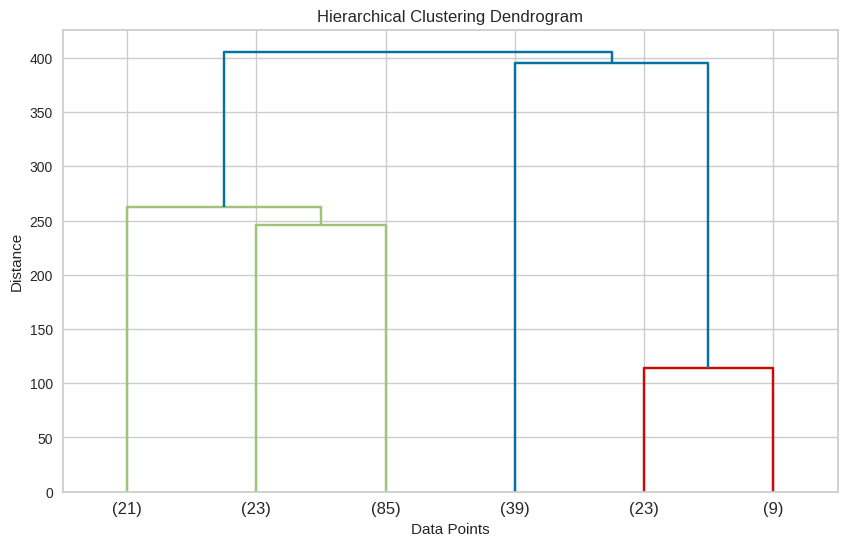

In [52]:
Z = linkage(df[['Annual Income (k$)', 'Spending Score (1-100)']], method='ward')

# Create a dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='lastp', p=6)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


###Analyzing the Hierarchical Clustering Dendrogram
The analysis of the hierarchical clustering dendrogram reveals the presence of six distinct clusters within the mall customer segmentation dataset. This indicates that there are underlying trends and patterns in the data that the algorithm has successfully identified and captured.

The dendrogram visualizes the hierarchical structure of the clusters, showcasing the linkage distances between data points. By utilizing the "ward" method for linkage, which minimizes the variance within clusters, we can observe the formation of six well-defined clusters.

The dendrogram plot provides valuable insights into the relationships and similarities among data points, allowing for a deeper understanding of the customer segmentation. Each vertical line in the dendrogram represents a data point, and the height of the horizontal branches indicates the distance or dissimilarity between clusters.

## Discussion/Conclusion
The clustering analysis has provided valuable insights into the customer segmentation based on their income and spending behavior. Here are the key findings from the analysis:

- **Distinct Customer Segments**: The K-means clustering algorithm identified distinct customer segments based on their income and spending score. The clusters can be categorized into different groups, each with its own characteristics and behaviors.

- **Characteristics of Customer Segments**: The cluster characteristics analysis revealed the average values of each feature within each segment. For example, Cluster 1 may represent high-income customers with high spending scores, indicating a group of affluent customers who are willing to spend more. On the other hand, Cluster 2 may represent customers with low incomes and low spending scores, suggesting a group of price-sensitive and budget-conscious customers.

- **Insights and Recommendations**: Based on the segmentation results, the mall can tailor its marketing strategies and offerings to target each customer segment more effectively. For instance, for high-income customers with high spending scores, the mall can focus on providing premium products and personalized experiences. For price-sensitive customers, the mall can emphasize value-for-money deals and promotions.

- **Limitations and Future Improvements**: It is important to acknowledge the limitations of the analysis. One limitation is that the clustering analysis is based solely on income and spending score, and other important variables such as age, gender, and preferences are not considered. Future improvements could involve incorporating additional relevant variables to create a more comprehensive customer segmentation. Furthermore, conducting further analysis and validation using external metrics or customer feedback can enhance the accuracy and reliability of the segmentation.

In conclusion, the customer segmentation analysis using K-means clustering has provided valuable insights into the distinct customer segments within the mall's customer base. Understanding these segments can enable the mall to develop targeted marketing strategies, enhance customer satisfaction, and drive business growth. It is essential to regularly reassess and refine the segmentation approach to adapt to changing customer behaviors and preferences.